In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
iris=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\Iris.csv')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

### Check size and shape of the data

In [3]:
iris.shape

(150, 5)

In [4]:
iris.size

750

### Check data types of each column

In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Statistical measues

In [7]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

### Check for null values

In [8]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Check for outliers

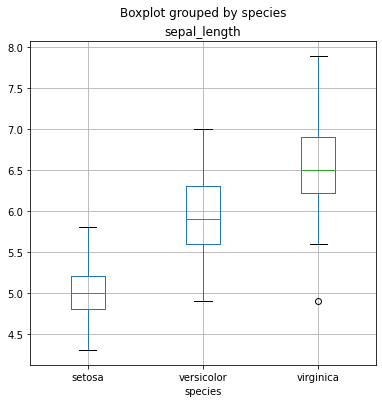

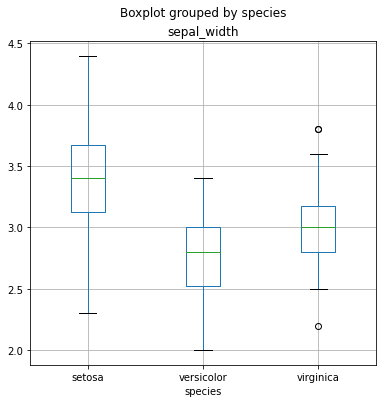

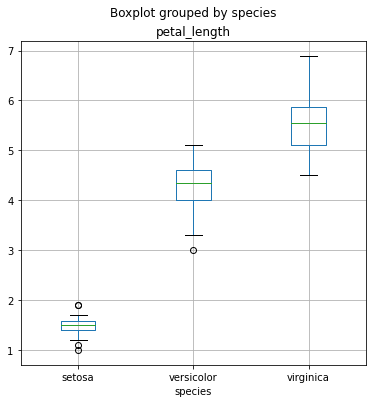

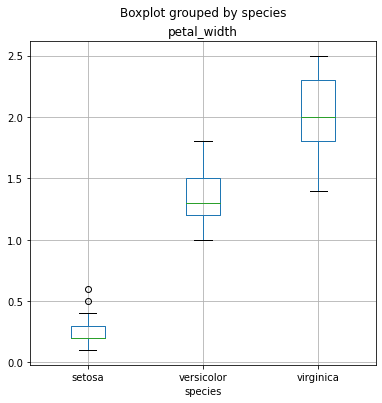

In [9]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
for col in features:
    iris.boxplot(column=col, by='species', figsize=(6,6))
    plt.title(col)
plt.show()

**There are outliers in sepal_length & sepal_width column under virginica species**
**Outliers in petal_length & petal_wdith column under setosa species**

### Check Corelation between columns

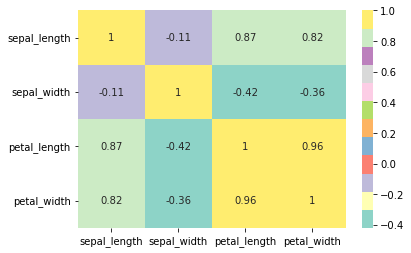

In [10]:
sns.heatmap(iris.corr(),annot=True, cmap='Set3');

**sepal_length and petal_length, sepal_length and petal_width, petal_length and petal_width are highly corelated**

### Pairplot to see relationship between different columns wrt Species

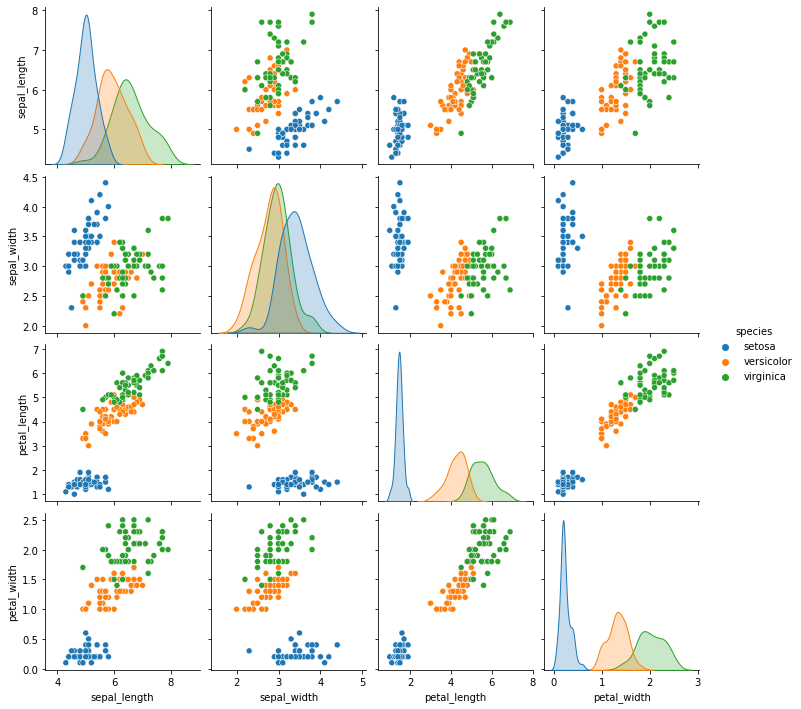

In [11]:
g = sns.pairplot(iris, hue='species');

### To perform logistic regression convert the dependent variables data type from string to integer or encode the label

In [12]:
iris1=iris

In [13]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
iris1.species = encode.fit_transform(iris1.species)

In [14]:
iris1.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [15]:
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

### Split the data into training and testing set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X,y=iris1[['sepal_length','sepal_width','petal_length','petal_width']].values, iris1['species'].values

In [18]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [19]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)
print ('Train size: %d\nTest size: %d' % (X_train.shape[0], X_test.shape[0]))

Train size: 105
Test size: 45


### Train the model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# Set regularization rate
reg = 0.01

model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


### Predict the values

In [23]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 2 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Actual labels:     [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


### Accuracy of model

In [24]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9555555555555556


**Accuracy is 95.55%**

In [25]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## Perform linear regression selecting sepal_length as dependent variable

### Seperate out the dependent and independent variables

In [26]:
X,y=iris1[['sepal_width','petal_length','petal_width']].values, iris1['sepal_length'].values

In [27]:
print("Independent Variable", X)
print("Dependent Variable", y)

Independent Variable [[3.5 1.4 0.2]
 [3.  1.4 0.2]
 [3.2 1.3 0.2]
 [3.1 1.5 0.2]
 [3.6 1.4 0.2]
 [3.9 1.7 0.4]
 [3.4 1.4 0.3]
 [3.4 1.5 0.2]
 [2.9 1.4 0.2]
 [3.1 1.5 0.1]
 [3.7 1.5 0.2]
 [3.4 1.6 0.2]
 [3.  1.4 0.1]
 [3.  1.1 0.1]
 [4.  1.2 0.2]
 [4.4 1.5 0.4]
 [3.9 1.3 0.4]
 [3.5 1.4 0.3]
 [3.8 1.7 0.3]
 [3.8 1.5 0.3]
 [3.4 1.7 0.2]
 [3.7 1.5 0.4]
 [3.6 1.  0.2]
 [3.3 1.7 0.5]
 [3.4 1.9 0.2]
 [3.  1.6 0.2]
 [3.4 1.6 0.4]
 [3.5 1.5 0.2]
 [3.4 1.4 0.2]
 [3.2 1.6 0.2]
 [3.1 1.6 0.2]
 [3.4 1.5 0.4]
 [4.1 1.5 0.1]
 [4.2 1.4 0.2]
 [3.1 1.5 0.1]
 [3.2 1.2 0.2]
 [3.5 1.3 0.2]
 [3.1 1.5 0.1]
 [3.  1.3 0.2]
 [3.4 1.5 0.2]
 [3.5 1.3 0.3]
 [2.3 1.3 0.3]
 [3.2 1.3 0.2]
 [3.5 1.6 0.6]
 [3.8 1.9 0.4]
 [3.  1.4 0.3]
 [3.8 1.6 0.2]
 [3.2 1.4 0.2]
 [3.7 1.5 0.2]
 [3.3 1.4 0.2]
 [3.2 4.7 1.4]
 [3.2 4.5 1.5]
 [3.1 4.9 1.5]
 [2.3 4.  1.3]
 [2.8 4.6 1.5]
 [2.8 4.5 1.3]
 [3.3 4.7 1.6]
 [2.4 3.3 1. ]
 [2.9 4.6 1.3]
 [2.7 3.9 1.4]
 [2.  3.5 1. ]
 [3.  4.2 1.5]
 [2.2 4.  1. ]
 [2.9 4.7 1.4]
 [2.9 3.6 1.3]
 [3.

### Divide the data into train and test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 105 rows
Test Set: 45 rows


### Create and fit the model

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


### Predicted values

In [32]:
prediction=model.predict(X_test)
prediction

array([5.91474586, 5.63172577, 5.47320376, 7.30877202, 5.03180608,
       6.86209812, 4.87504165, 6.41293394, 6.36332528, 5.81667735,
       6.84832268, 6.32407313, 6.42231359, 6.14178377, 6.35128341,
       4.90537848, 6.1297419 , 6.0623026 , 4.62797521, 5.06624633,
       6.03272248, 6.19451898, 5.33908186, 4.63110175, 6.09171078,
       4.77726552, 5.46238292, 6.11191126, 5.15877023, 4.97281778,
       6.82377462, 6.19451898, 5.09658316, 6.29808388, 6.43464783,
       5.60717771, 5.37664866, 6.39319779, 5.96406215, 5.75502682,
       6.55528667, 4.74861404, 6.17698072, 4.90178761, 5.22613732])

In [33]:
y_test

array([5.8, 6. , 5.5, 7.3, 5. , 6.3, 5. , 6.7, 6.8, 6.1, 6.1, 6.4, 6.1,
       6.5, 6.1, 4.9, 6. , 5.5, 4.8, 5.4, 5.6, 5.6, 4.8, 4.4, 6.2, 4.6,
       5.1, 6.2, 5. , 5. , 6.4, 5.4, 5.2, 6.1, 6.4, 5.2, 5.7, 6. , 5.9,
       5.8, 6.8, 4.7, 6.9, 5. , 5.4])

### Accuracy of the model

In [34]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
print("Training Accuracy", model.score(X_train, y_train))
print("Testing Accuracy", model.score(X_test, y_test))

MSE: 0.11514434578826725
RMSE: 0.33932925866813674
R2: 0.7570566597678157
Training Accuracy 0.8824250413099423
Testing Accuracy 0.7570566597678157
